In [60]:
import pandas as pd
import numpy as np
import sklearn as sk

In [61]:
df = pd.read_csv('restaurant-1-orders.csv')

In [62]:
df.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [63]:
df.drop(columns=['Order Number', 'Total products', 'Item Name', 'Product Price'], inplace=True)

In [64]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y %H:%M')

In [65]:
df

,Order Date,Quantity
0,2019-08-03 20:25:00,2
1,2019-08-03 20:25:00,1
2,2019-08-03 20:25:00,1
3,2019-08-03 20:25:00,1
4,2019-08-03 20:25:00,1
...,...,...
74813,2016-05-18 18:53:00,2
74814,2016-05-14 19:28:00,2
74815,2016-05-10 13:18:00,2
74816,2016-04-07 19:04:00,1


In [66]:
df.sort_values(by='Order Date', inplace=True)

In [67]:
# will have to remove the first 10 rows as they are wrong about the time stamp and total products. this will affect the plots.
df.drop(df.head(10).index, inplace=True)
df

,Order Date,Quantity
54026,2015-09-29 15:20:00,1
42118,2015-09-29 15:20:00,1
39142,2015-09-29 15:20:00,3
42117,2015-09-29 15:36:00,2
50996,2015-09-29 15:36:00,1
...,...,...
4,2019-08-03 20:25:00,1
3,2019-08-03 20:25:00,1
2,2019-08-03 20:25:00,1
1,2019-08-03 20:25:00,1


In [68]:
df.reset_index(drop=True, inplace=True)


In [69]:
df = df.resample('D', on='Order Date').sum().reset_index()

In [70]:
df

,Order Date,Quantity
0,2015-09-29,9
1,2015-09-30,20
2,2015-10-01,21
3,2015-10-02,20
4,2015-10-03,0
...,...,...
1400,2019-07-30,100
1401,2019-07-31,87
1402,2019-08-01,65
1403,2019-08-02,132


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Order Date', ylabel='Quantity'>

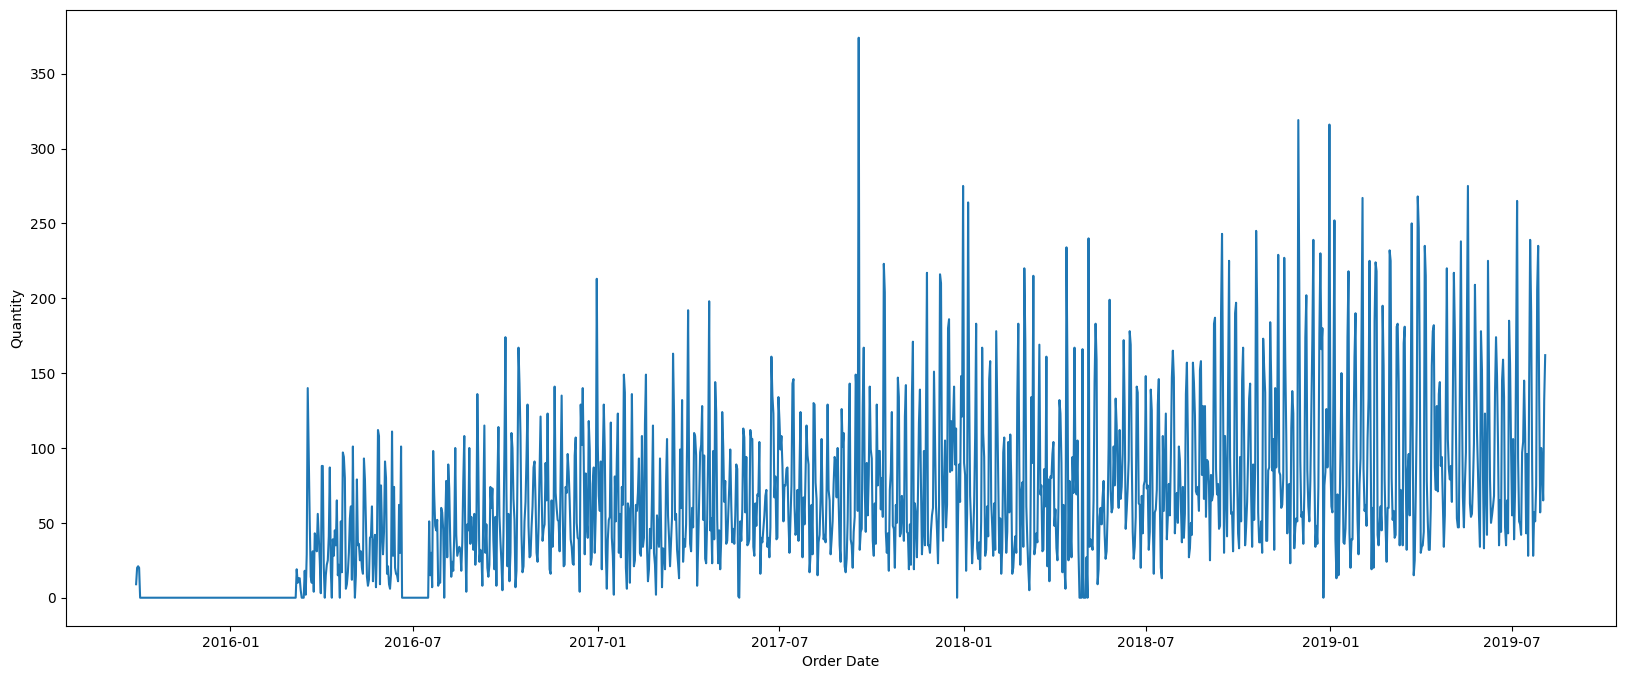

In [72]:
plt.figure(figsize=(20,8))
sns.lineplot(df, x='Order Date', y='Quantity')

In [76]:
df.describe()

,Order Date,Quantity
count,1405,1405.000000
mean,2017-08-31 00:00:00,66.214235
min,2015-09-29 00:00:00,0.000000
25%,2016-09-14 00:00:00,25.000000
50%,2017-08-31 00:00:00,54.000000
75%,2018-08-17 00:00:00,94.000000
max,2019-08-03 00:00:00,374.000000
std,NaN,57.357631


<Axes: >

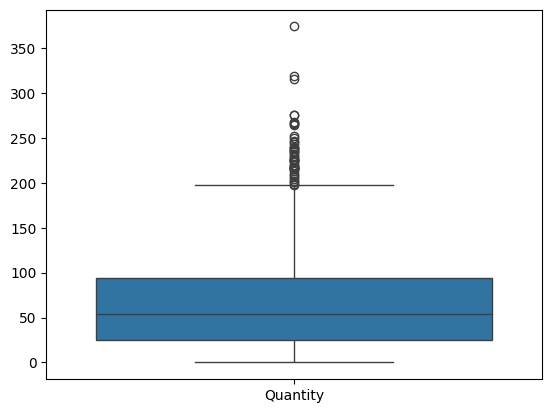

In [73]:
sns.boxplot(df)

In [78]:
# removing outliers

Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
df.shape

(1356, 2)

In [80]:
df.describe()

,Order Date,Quantity
count,1356,1356.000000
mean,2017-08-16 09:02:39.292035328,60.064897
min,2015-09-29 00:00:00,0.000000
25%,2016-09-01 18:00:00,24.000000
50%,2017-08-08 12:00:00,52.000000
75%,2018-07-26 06:00:00,89.000000
max,2019-08-03 00:00:00,197.000000
std,NaN,47.798997


<Axes: xlabel='Quantity', ylabel='Density'>

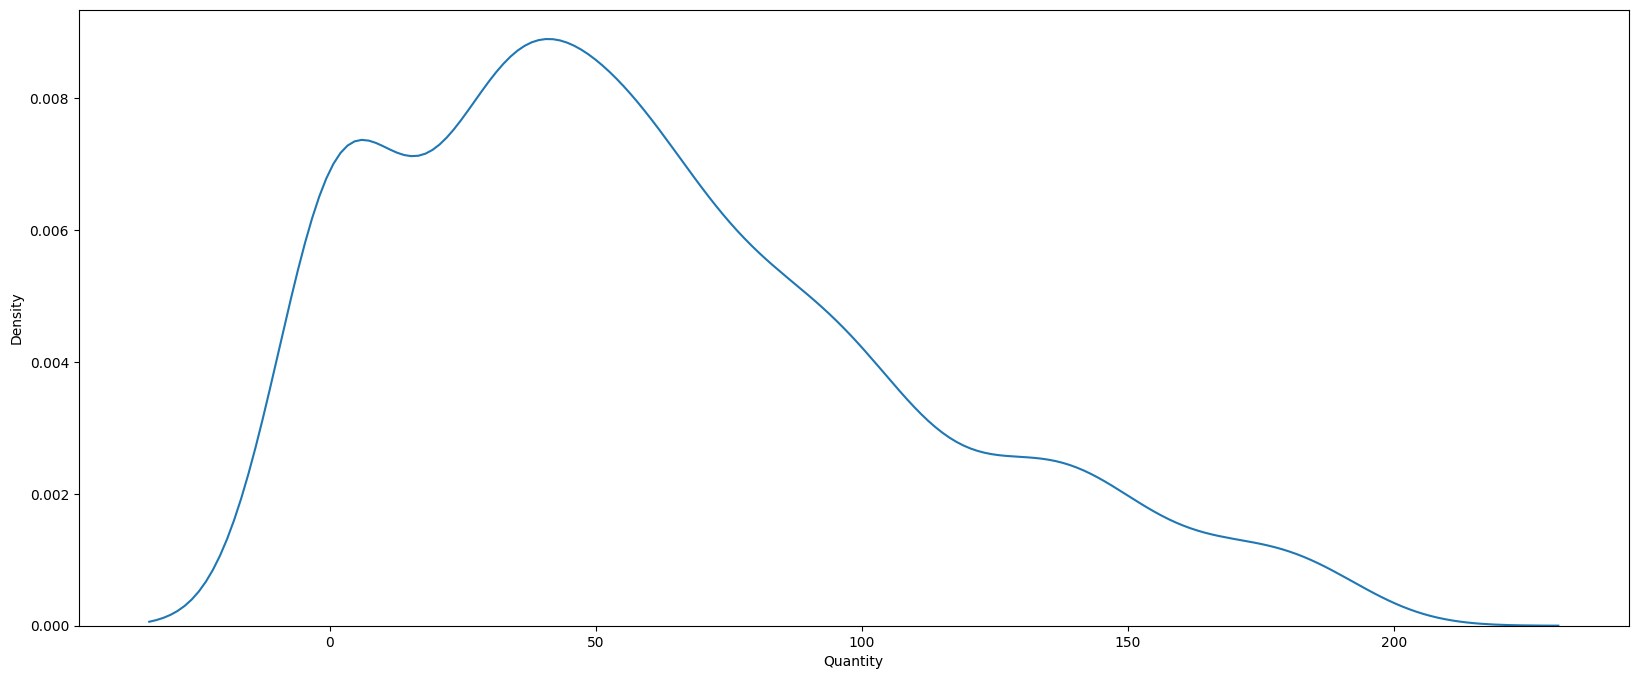

In [82]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=df, x = 'Quantity')

In [83]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Quantity'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.403786638179587
p-value: 0.1406705091236004


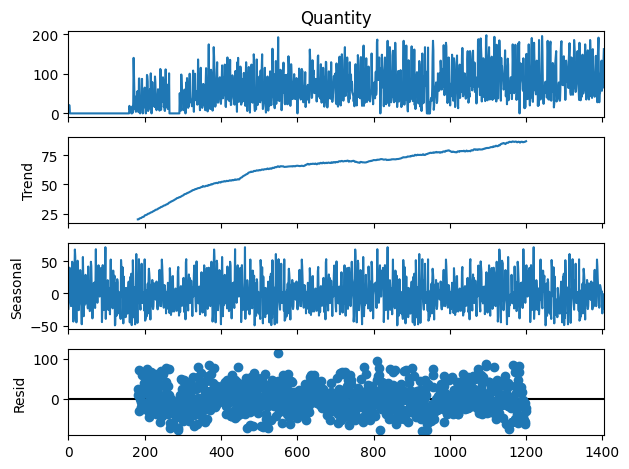

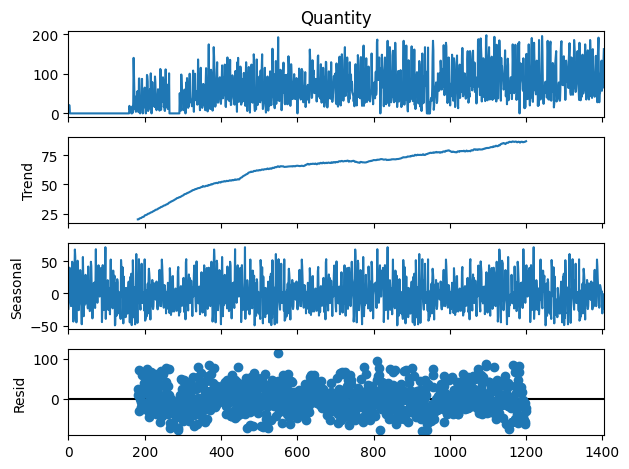

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Quantity'], model='additive', period=365)  # Assuming yearly seasonality
decomposition.plot()

<Figure size 1000x600 with 0 Axes>

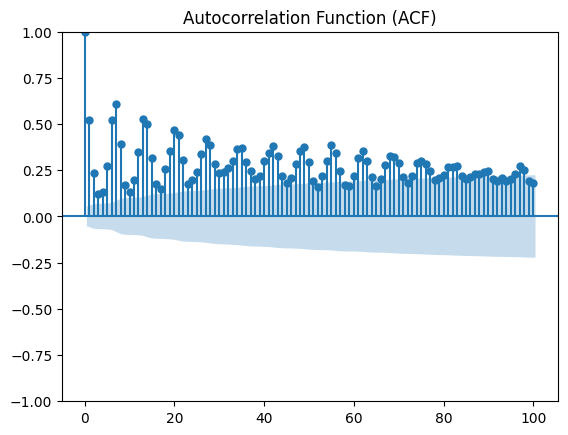

In [99]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming your cleaned time series data is in a DataFrame called df
# and the column name for Quantity is 'Quantity'

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(df['Quantity'], lags=100)  # Adjust the lags based on your data
plt.title('Autocorrelation Function (ACF)')
plt.show()

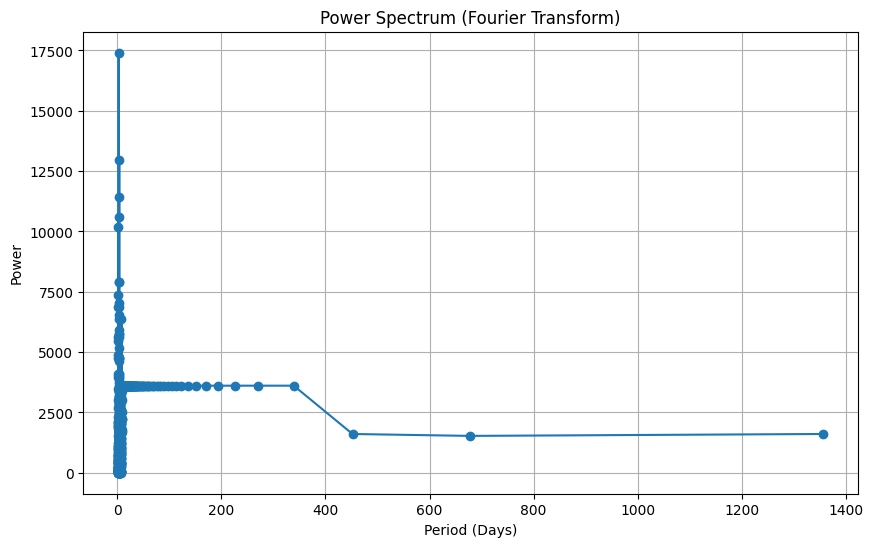

In [88]:
from scipy.fft import fft
import numpy as np

# Perform Fast Fourier Transform (FFT) on the data
quantity = df['Quantity'] - df['Quantity'].mean()  # Demean the data
quantity = pd.DataFrame(quantity)
fft_result = fft(quantity)

# Get the power spectrum
power = np.abs(fft_result)**2
freq = np.fft.fftfreq(len(power))  # Frequency bins

# Focus on positive frequencies
positive_freqs = freq[freq > 0]
positive_power = power[freq > 0]

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.plot(1 / positive_freqs, positive_power, marker='o')
plt.title('Power Spectrum (Fourier Transform)')
plt.xlabel('Period (Days)')
plt.ylabel('Power')
plt.grid()
plt.show()

### Linear Regression

### Polynomial Regression

### Auto Regression

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [97]:
# Define SARIMA parameters
p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, s = 1, 1, 1, 7  # Seasonal parameters (weekly seasonality)

# Fit SARIMA model
model = SARIMAX(df['Quantity'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_result = model.fit(disp=False)

/Users/sandeephugar/VSCProjects/foodrecom/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/sandeephugar/VSCProjects/foodrecom/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                          Quantity   No. Observations:                 1356
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -6674.281
Date:                           Wed, 22 Jan 2025   AIC                          13358.563
Time:                                   12:07:13   BIC                          13384.561
Sample:                                        0   HQIC                         13368.303
                                          - 1356                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2267      0.022     10.481      0.000       0.184       0.269
ma.L1         -0.9949      0.003   -311.547

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/229982853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SARIMA_Predictions'] = sarima_result.fittedvalues


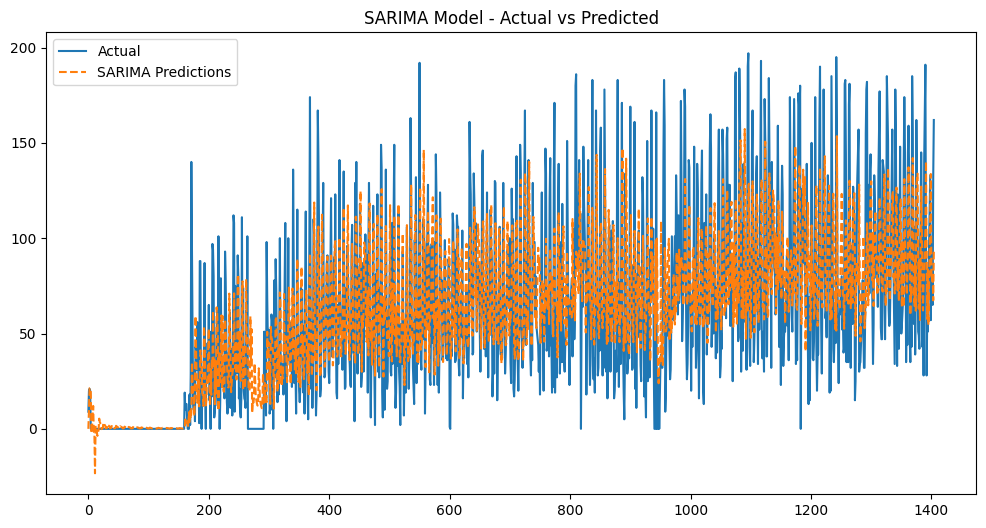

Mean Absolute Error (MAE): 25.641522201347808
Mean Squared Error (MSE): 1216.7791528269274


In [98]:
# Print summary of the model
print(sarima_result.summary())

# Generate predictions
df['SARIMA_Predictions'] = sarima_result.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(12, 6))
plt.plot(df['Quantity'], label='Actual')
plt.plot(df['SARIMA_Predictions'], label='SARIMA Predictions', linestyle='--')
plt.title('SARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()

# Calculate metrics
mae = mean_absolute_error(df['Quantity'], df['SARIMA_Predictions'])
mse = mean_squared_error(df['Quantity'], df['SARIMA_Predictions'])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

In [113]:
df['SARIMA_Predictions'] = df['SARIMA_Predictions'].abs().astype(int)


/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/728070468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SARIMA_Predictions'] = df['SARIMA_Predictions'].abs().astype(int)


In [114]:
df.Quantity.describe()

count    1356.000000
mean       60.064897
std        47.798997
min         0.000000
25%        24.000000
50%        52.000000
75%        89.000000
max       197.000000
Name: Quantity, dtype: float64

In [115]:
df['SARIMA_Predictions'].describe()

count    1356.000000
mean       60.534661
std        35.560679
min         0.000000
25%        37.000000
50%        62.000000
75%        85.000000
max       157.000000
Name: SARIMA_Predictions, dtype: float64

In [116]:
df.sample(20)

,Order Date,Quantity,SARIMA_Predictions
1101,2018-10-04,51,82
1282,2019-04-03,35,45
812,2017-12-19,118,83
821,2017-12-28,64,99
1262,2019-03-14,35,65
968,2018-05-24,56,50
1064,2018-08-28,66,83
653,2017-07-13,75,65
1260,2019-03-12,72,67
13,2015-10-12,0,0


In [117]:
dfgweek = df.resample('W', on='Order Date').sum()
dfgweek.reset_index()
mae = mean_absolute_error(dfgweek['Quantity'], dfgweek['SARIMA_Predictions'])
mse = mean_squared_error(dfgweek['Quantity'], dfgweek['SARIMA_Predictions'])

In [118]:
print(dfgweek.shape)
print(mae)
print(mse)

(201, 2)
54.45273631840796
5633.5970149253735


/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/879467712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoothed_Quantity'] = df['Quantity'].rolling(window=window_size).mean()
/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/879467712.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the oper

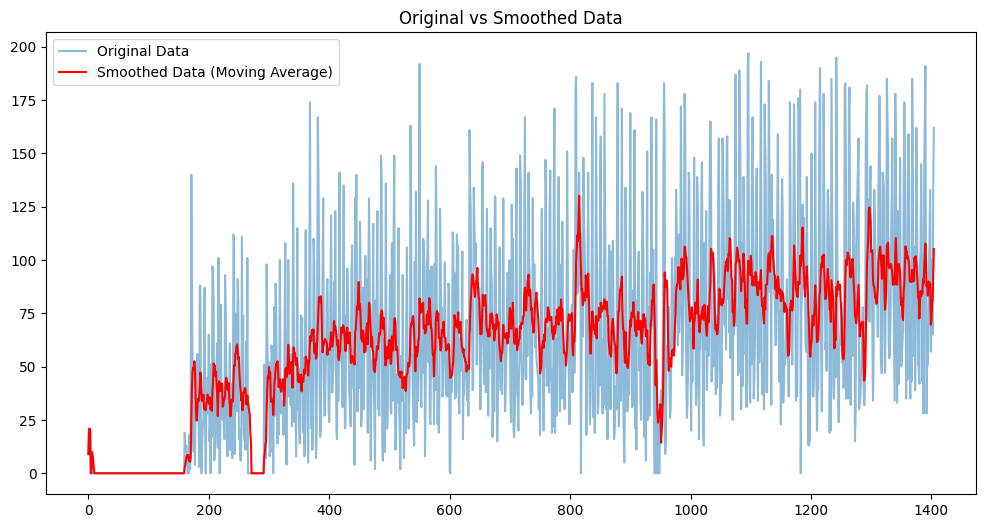

In [119]:
# Apply moving average smoothing
window_size = 7  # Weekly moving average
df['Smoothed_Quantity'] = df['Quantity'].rolling(window=window_size).mean()

# Fill NaN values (from rolling) with the original data or forward fill
df['Smoothed_Quantity'].fillna(df['Quantity'], inplace=True)

# Plot original vs smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df['Quantity'], label='Original Data', alpha=0.5)
plt.plot(df['Smoothed_Quantity'], label='Smoothed Data (Moving Average)', color='red')
plt.title('Original vs Smoothed Data')
plt.legend()
plt.show()

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/2601819668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoothed_Quantity'] = df['Quantity'].ewm(alpha=alpha, adjust=False).mean()


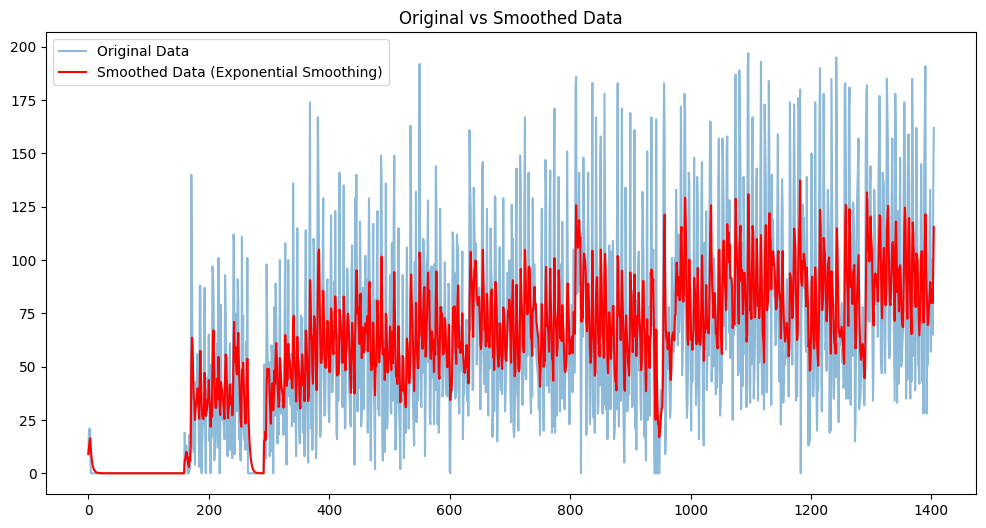

In [120]:
# Apply exponential smoothing
alpha = 0.3  # Smoothing factor (0 < alpha < 1)
df['Smoothed_Quantity'] = df['Quantity'].ewm(alpha=alpha, adjust=False).mean()

# Plot original vs smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df['Quantity'], label='Original Data', alpha=0.5)
plt.plot(df['Smoothed_Quantity'], label='Smoothed Data (Exponential Smoothing)', color='red')
plt.title('Original vs Smoothed Data')
plt.legend()
plt.show()

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/2512477746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_Quantity'] = np.log1p(df['Quantity'])  # log1p avoids log(0)


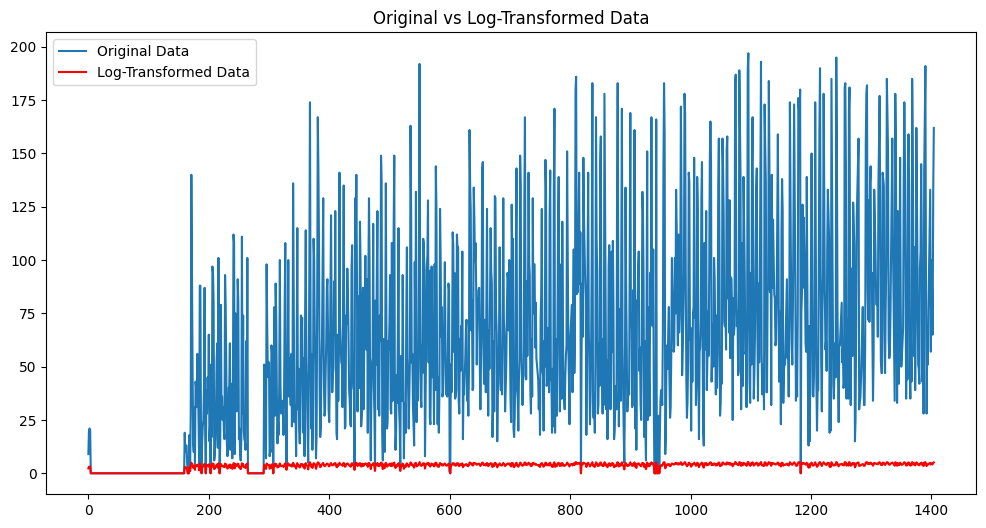

In [121]:
# Log transform the data
df['Transformed_Quantity'] = np.log1p(df['Quantity'])  # log1p avoids log(0)

# Plot transformed data
plt.figure(figsize=(12, 6))
plt.plot(df['Quantity'], label='Original Data')
plt.plot(df['Transformed_Quantity'], label='Log-Transformed Data', color='red')
plt.title('Original vs Log-Transformed Data')
plt.legend()
plt.show()

/Users/sandeephugar/VSCProjects/foodrecom/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/sandeephugar/VSCProjects/foodrecom/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/1786866170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

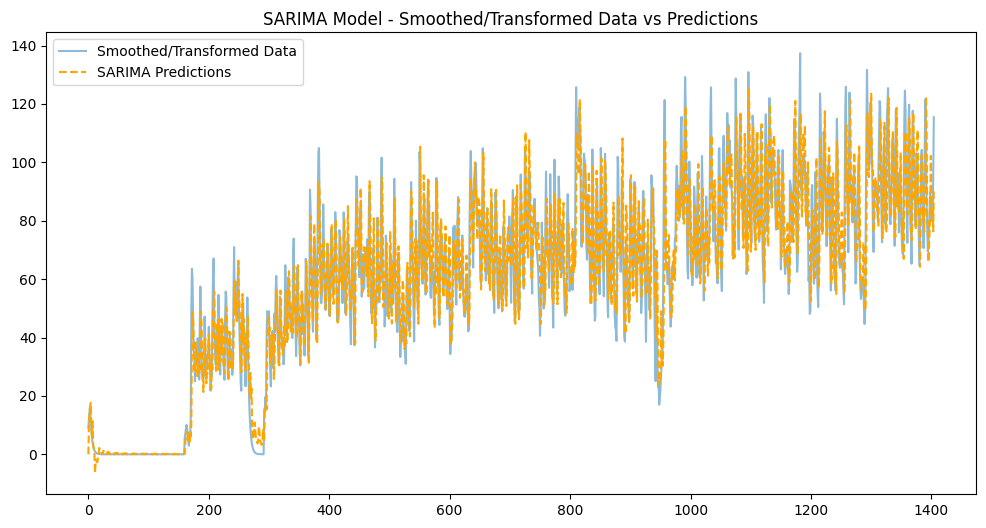

In [129]:
# Use smoothed and/or transformed data
target_column = 'Smoothed_Quantity'  # Or 'Transformed_Quantity' based on your choice

# Re-fit SARIMA model
model = SARIMAX(df[target_column],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_result = model.fit(disp=False)

# Evaluate and plot
df['SARIMA_Predictions'] = sarima_result.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(df[target_column], label='Smoothed/Transformed Data', alpha=0.5)
plt.plot(df['SARIMA_Predictions'], label='SARIMA Predictions', linestyle='--', color='orange')
plt.title('SARIMA Model - Smoothed/Transformed Data vs Predictions')
plt.legend()
plt.show()

In [133]:
mae = mean_absolute_error(df['SARIMA_Predictions'], df['Quantity'])
mse = mean_squared_error(df['SARIMA_Predictions'], df['Quantity'])
print(mae)
print(mse)

28.948476079678457
1522.8007258774608


In [132]:
df

,Order Date,Quantity,SARIMA_Predictions,Smoothed_Quantity,Transformed_Quantity
0,2015-09-29,9.0,0.000000,9.000000,2.302585
1,2015-09-30,20.0,11.224650,12.300000,3.044522
2,2015-10-01,21.0,14.410128,14.910000,3.091042
3,2015-10-02,20.0,16.685487,16.437000,3.044522
4,2015-10-03,0.0,17.649031,11.505900,0.000000
...,...,...,...,...,...
1400,2019-07-30,100.0,83.823387,85.929376,4.615121
1401,2019-07-31,87.0,81.870003,86.250563,4.477337
1402,2019-08-01,65.0,83.488750,79.875394,4.189655
1403,2019-08-02,132.0,76.350158,95.512776,4.890349


### Random Forest Regressor & Boosting Regressor

In [134]:
df

,Order Date,Quantity,SARIMA_Predictions,Smoothed_Quantity,Transformed_Quantity
0,2015-09-29,9.0,0.000000,9.000000,2.302585
1,2015-09-30,20.0,11.224650,12.300000,3.044522
2,2015-10-01,21.0,14.410128,14.910000,3.091042
3,2015-10-02,20.0,16.685487,16.437000,3.044522
4,2015-10-03,0.0,17.649031,11.505900,0.000000
...,...,...,...,...,...
1400,2019-07-30,100.0,83.823387,85.929376,4.615121
1401,2019-07-31,87.0,81.870003,86.250563,4.477337
1402,2019-08-01,65.0,83.488750,79.875394,4.189655
1403,2019-08-02,132.0,76.350158,95.512776,4.890349


In [135]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version

In [138]:
# Create new features from 'Order Date'
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['day'] = df['Order Date'].dt.day
df['day_of_week'] = df['Order Date'].dt.dayofweek  # 0: Monday, 6: Sunday
df['is_weekend'] = (df['Order Date'].dt.dayofweek >= 5).astype(int)
df['hour'] = df['Order Date'].dt.hour


# Create lag features
df['Quantity_lag_1'] = df['Quantity'].shift(1)

# Create rolling mean
df['Quantity_rolling_mean_7'] = df['Quantity'].rolling(window=7).mean()

# Handle missing values (if any)
df = df.fillna(0)  # Replace missing values with 0

# 2. Feature Selection (For demonstration, using a subset of features)
features = ['year', 'month', 'day', 'day_of_week', 'is_weekend', 'hour', 'Quantity_lag_1', 'Quantity_rolling_mean_7']
X = df[features]
y = df['Quantity']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

# 4. Create and train XGBoost model
model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# ... Further analysis and model tuning can be performed ...

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/1787095573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Order Date'].dt.year
/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/1787095573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Order Date'].dt.month
/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_60674/1787095573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Mean Squared Error: 872.6742321732353


In [139]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

22.735199828294004


In [141]:
y_tpred = model.predict(X_train)
mae = mean_absolute_error(y_tpred, y_train)
mse = mean_squared_error(y_tpred, y_train)
print(mae)
print(mse)

13.708188102421794
350.9217080017959


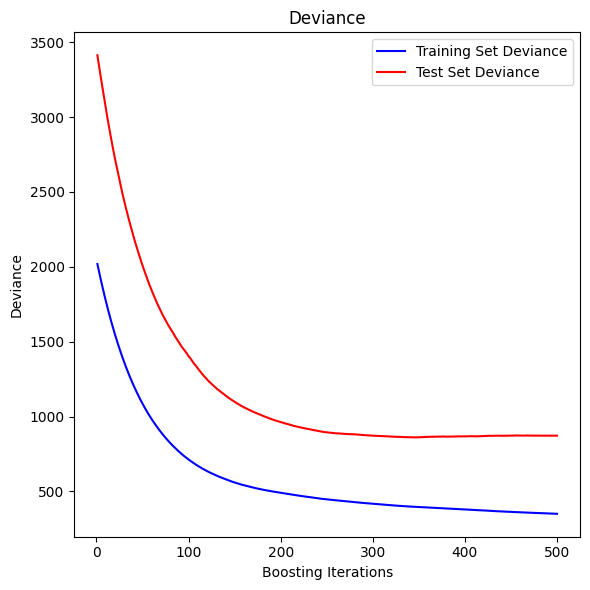

In [144]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

### Prophet by Facebook

### Classification

### Clustering

### Hybrid Models